### Load Dataset

In [2]:
import pandas as pd

df = pd.read_excel('student_exam_scores.xlsx')
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,11.4,4.5,60.9,67.0,40.8
1,S002,4.4,6.3,74.8,68.0,NaN
2,S003,10.3,NaN,59.1,79.0,42.1
3,S004,3.4,5.3,90.9,81.0,29.3
4,S005,11.9,8.4,53.9,78.0,48.6


In [3]:
#Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran Dataset (baris, kolom) : ", df.shape)

#Mengecek jumlah total elemen dalam dataset
print("Jumlah total elemen dalam dataset : ", df.size)

Ukuran Dataset (baris, kolom) :  (255, 6)
Jumlah total elemen dalam dataset :  1530


In [4]:
#Mengecek tipe data dari sebuah variabel
my_variable = "Hello"
print("Tipe data my_variable: ", type(my_variable))

my_number = 123
print("Tipe data my_number: ", type(my_number))

#Mengecek tipe data dari setiap kolom dalam DataFrame
print("\nTipe data dari setiap kolom dalam DataFrame:")
print(df.dtypes)

Tipe data my_variable:  <class 'str'>
Tipe data my_number:  <class 'int'>

Tipe data dari setiap kolom dalam DataFrame:
student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores       float64
exam_score            float64
dtype: object


In [5]:
# mencari nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom: ")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom: 
student_id             0
hours_studied          9
sleep_hours            8
attendance_percent     9
previous_scores        9
exam_score            10
dtype: int64


In [6]:
#Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

#Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

#Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_rows_count > 0:
    print("\nBeberapa baris duplikat pertama:")
    print(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 5

Beberapa baris duplikat pertama:
   student_id  hours_studied  sleep_hours  attendance_percent  \
14       S015            2.9          4.4                88.3   
15       S015            2.9          4.4                88.3   
17       S017            3.2          7.2                85.8   
18       S017            3.2          7.2                85.8   
21       S020            9.9          4.8                92.5   

    previous_scores  exam_score  
14             86.0        35.2  
15             86.0        35.2  
17             50.0        26.4  
18             50.0        26.4  
21             54.0        35.6  


### Cleaning Data

In [ ]:
# Mencari nilai modus setiap kolom

# Kolom Hours Studied
studied_mode = df['hours_studied'].mode()[0]
print(f"Nilai modus untuk kolom 'Lama Belajar': {studied_mode}")

# Kolom Lama Tidur
sleep_mode = df['sleep_hours'].mode()[0]
print(f"Nilai modus untuk kolom 'Lama Tidur': {sleep_mode}")

# Kolom Kehadiran
attendance_mode = df['attendance_percent'].mode()[0]
print(f"Nilai modus untuk kolom 'Kehadiran': {attendance_mode}")

# Kolom Ujian Lalu
previous_mode = df['previous_scores'].mode()[0]
print(f"Nilai modus untuk kolom 'Ujian kalu' : {previous_mode}")

# Exam score
exam_mode = df['exam_score'].mode()[0]
print(f"Nilai modus untuk kolom 'Ujian saat ini' : {exam_mode}")

Nilai modus untuk kolom 'Lama Belajar': 3.9
Nilai modus untuk kolom 'Lama Tidur': 5.5
Nilai modus untuk kolom 'Kehadiran': 92.5
Nilai modus untuk kolom 'Ujian kalu' : 58.0
Nilai modus untuk kolom 'Ujian saat ini' : 35.0


In [15]:
# Mengisi nilai yang hilang pada kolom dengan modus
df['hours_studied'] = df['hours_studied'].fillna(studied_mode)
df['sleep_hours'] = df['sleep_hours'].fillna(sleep_mode)
df['attendance_percent'] = df['attendance_percent'].fillna(attendance_mode)
df['previous_scores'] = df['previous_scores'].fillna(previous_mode)
df['exam_score'] = df['exam_score'].fillna(exam_mode)

# Verifikasi bahwa tidak ada nilai yang hilang pada kolom
missing_values_after_fill = df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']].isnull().sum()
print(missing_values_after_fill)

hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64


In [16]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"\nJumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat tersebut
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada baris duplikat lagi
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama dari DataFrame setelah pembersihan:")
    display(df.head())


Jumlah baris duplikat: 5

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama dari DataFrame setelah pembersihan:


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,11.4,4.5,60.9,67.0,40.8
1,S002,4.4,6.3,74.8,68.0,35.0
2,S003,10.3,5.5,59.1,79.0,42.1
3,S004,3.4,5.3,90.9,81.0,29.3
4,S005,11.9,8.4,53.9,78.0,48.6


### Eksplorasi Data

In [17]:
# Indenifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: student_id
student_id
S001    1
S002    1
S003    1
S004    1
S005    1
       ..
S246    1
S247    1
S248    1
S249    1
S250    1
Name: count, Length: 250, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,6.232400,6.557600,75.607600,66.568000,33.955200
std,3.258506,1.499358,14.591574,15.160632,7.578722
min,0.500000,1.000000,20.000000,40.000000,10.000000
25%,3.600000,5.400000,62.700000,54.000000,29.600000
50%,5.900000,6.600000,77.000000,67.000000,34.200000
75%,8.800000,7.900000,88.275000,79.000000,38.175000
max,20.000000,9.000000,100.000000,95.000000,90.000000


### Mencari Outlier

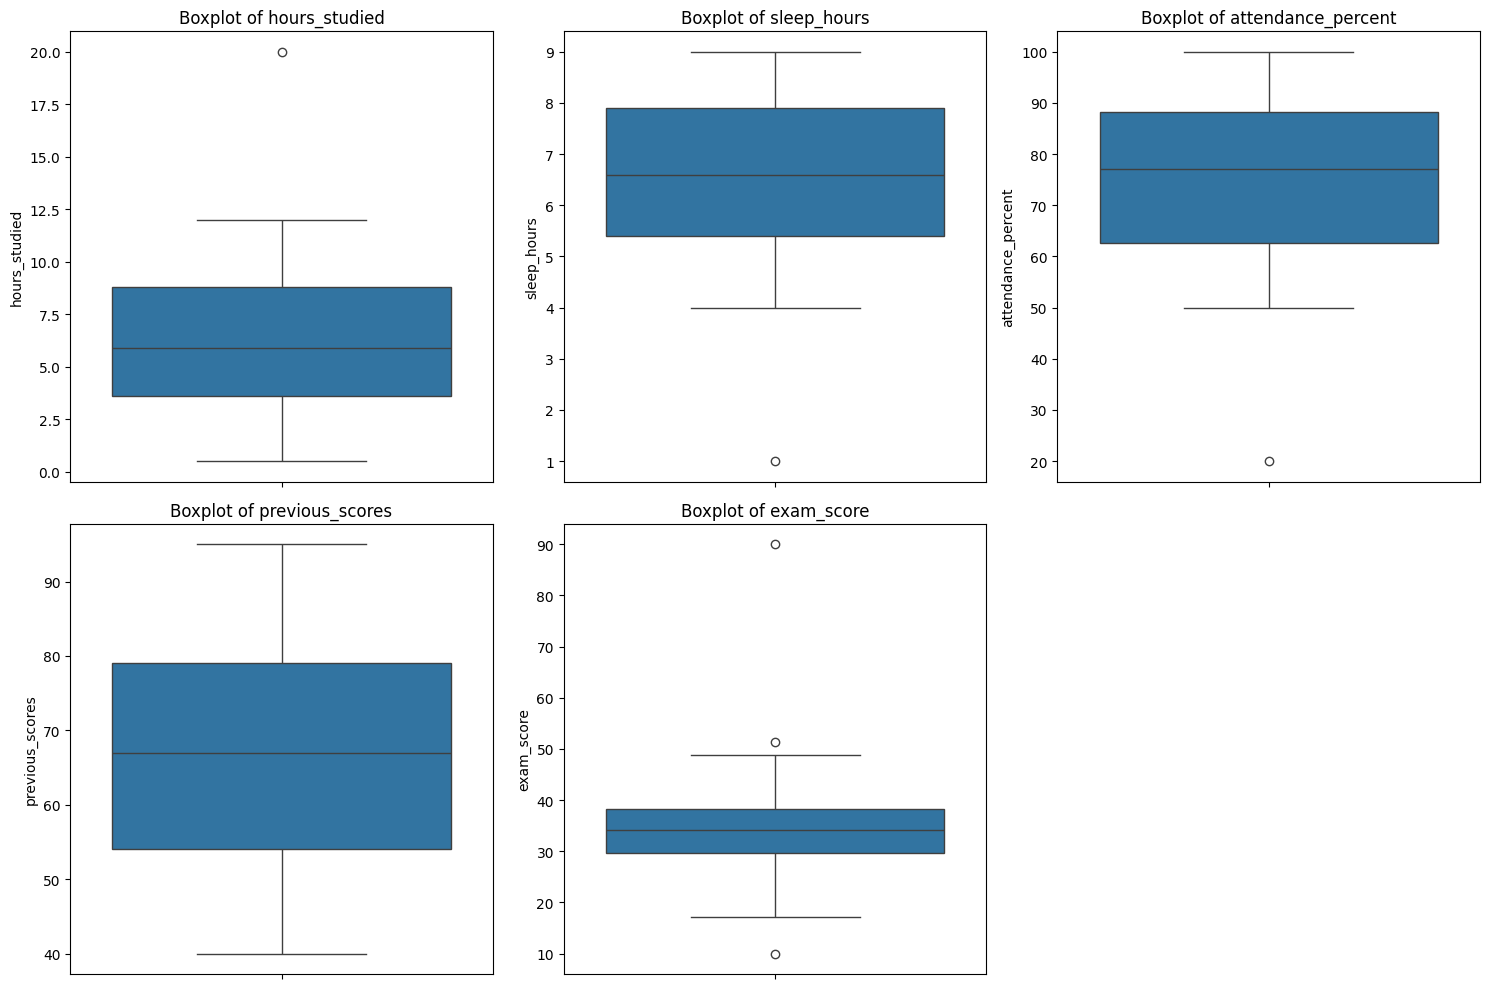

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik (tanpa student_id)
numerical_cols = ['hours_studied', 'sleep_hours', 'attendance_percent',
                  'previous_scores', 'exam_score']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [22]:
import numpy as np

# Kolom numerik
cols = ['hours_studied', 'sleep_hours', 'attendance_percent',
        'previous_scores', 'exam_score']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

df.shape


(250, 6)

### Save Data bersih sebagai CSV

In [23]:
output_file_name = 'Data_bersih.csv'
df.to_csv(output_file_name, index=False)

print(F"DataFrame telah berhasil disimpan ke dalam file '{output_file_name}'")

DataFrame telah berhasil disimpan ke dalam file 'Data_bersih.csv'
